# CICIDS2017

Adding the necessary libraries:

In [1]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder


First identified the attack types which we want to use in our dataset, which are DDoS. Then created a .csv file containing the traffic for these three attack types as well as BENIGN (normal) traffic.

The process includes reading the data from the dataset file, merging the DDoS attacks, reducing noise, finding and replacing NaN values with column averages, and converting data types to int64 and float64.

In [ ]:
import pandas as pd

# Read the CSV file in chunks
chunk_size = 10000  # Adjust the chunk size as needed
chunks = pd.read_csv("data.csv", chunksize=chunk_size)

# Initialize an empty DataFrame to store the processed chunks
df = pd.DataFrame()

# Process each chunk separately to reduce memory usage
for chunk in chunks:
    # Count the occurrences of each unique value in the ' Label' column for this chunk
    chunk_value = chunk[' Label'].value_counts()
    
    # Map labels to a reduced set of labels for this chunk
    label_mapping = {
        'DoS Hulk': 'DoS',
        'DoS GoldenEye': 'DoS',
        'DoS Slowhttptest': 'DoS',
        'DoS slowloris': 'DoS',
        'BENIGN': 'BENIGN',
        'DDoS': 'DDoS',
        'PortScan': 'PortScan'
    }
    chunk[' Label'] = chunk[' Label'].apply(lambda x: label_mapping.get(x, x))
    
    # Drop duplicate rows for this chunk
    chunk = chunk.drop_duplicates()
    
    # Concatenate this chunk with the main DataFrame
    df = pd.concat([df, chunk], ignore_index=True)

# Count the occurrences of each unique value in the ' Label' column of the new DataFrame
df_value = df[' Label'].value_counts()

# Check the data types of the columns
datatype = df.dtypes

# Convert 'Flow Bytes/s' and ' Flow Packets/s' columns to float64 data type
df['Flow Bytes/s'] = pd.to_numeric(df['Flow Bytes/s'], errors='coerce')
df[' Flow Packets/s'] = pd.to_numeric(df[' Flow Packets/s'], errors='coerce')

# Handle NaN values by filling them with the mean value of the respective columns
df['Flow Bytes/s'].fillna(df['Flow Bytes/s'].mean(), inplace=True)
df[' Flow Packets/s'].fillna(df[' Flow Packets/s'].mean(), inplace=True)

# Print various statistics and information about the dataset before and after preprocessing
print('Original dataset value counts:\n', df_value)
print('Original dataset shape:', df.shape)


Converting the final dataset to .csv format.

Saving the DataFrame df2 to a .csv file named "dataset.csv" with comma-separated values, encoded in UTF-8 format, and without including the index column.

Proceeding by reading the newly created "dataset.csv" file for further steps. 

Reading the dataset.csv file and displaying the dataset.

In [3]:
import pandas as pd

dataset = pd.read_csv("C:/Users/Admin/Desktop/project exhibition/CICIDS2017/dataset.csv")
print(dataset)


          Destination Port   Flow Duration   Total Fwd Packets  \
0                    54865               3                   2   
1                    55054             109                   1   
2                    55055              52                   1   
3                    46236              34                   1   
4                    54863               3                   2   
...                    ...             ...                 ...   
1042552                 53           32215                   4   
1042553                 53             324                   2   
1042554              58030              82                   2   
1042555                 53         1048635                   6   
1042556                 53           94939                   4   

          Total Backward Packets  Total Length of Fwd Packets  \
0                              0                           12   
1                              1                            6   
2           

Applying algorithms in pairs of binary groups: (DDoS, BENIGN); initially extracted rows with specific labels from the existing dataframe to create new dataframes.

Creating a dataframe containing DDoS and BENIGN labels.

In [4]:
import pandas as pd

# Assuming dataset is your DataFrame
DDoS_df1 = dataset[dataset[' Label'] == 'BENIGN']
DDoS_df2 = dataset[dataset[' Label'] == 'DDoS']

# Concatenate the two DataFrames vertically
DDoS_df = pd.concat([DDoS_df1, DDoS_df2], ignore_index=True)

# Now DDoS_df contains rows from both DDoS_df1 and DDoS_df2


Labeling attack traffic as abnormal and BENIGN traffic as normal, then creating the dataframe.

In [5]:
NA_df=dataset
NA_df[' Label']=NA_df[' Label'].apply({'DoS':'Anormal','BENIGN':'Normal' ,'DDoS':'Anormal', 'PortScan':'Anormal'}.get)
NA_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Normal
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Normal
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Normal
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Normal
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042552,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Normal
1042553,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Normal
1042554,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Normal
1042555,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Normal


Created CSV files for the datasets generated to use in KNIME.

Here are the filenames and corresponding dataframes:

'DDoS_dataset.csv': DDoS_df
'NormalAnormal_dataset.csv': NA_df







NaN_values2=DDoS_df.isnull().sum()
NaN_values4=NA_df.isnull().sum()
NaN_values2
NaN_values4

Methods for algorithm

In [64]:
def train_test_dataset(df):
    labelencoder = LabelEncoder()
    df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
    X = df.drop([' Label'],axis=1) 
    y = df.iloc[:, -1].values.reshape(-1,1)
    y=np.ravel(y)
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 0, stratify = y)
    return  X_train, X_test, y_train, y_test

In [ ]:
def RandomForest(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(random_state = 0)
    imputer = Imputer(missing_values="NaN", strategy = "mean")
    imputer = imputer.fit(X_train)
    X_train = imputer.transform(X_train)
    X_test = imputer.transform(X_test)
    rf.fit(X_train,y_train) # modelin veri üzerinde öğrenmesi fit fonksiyonuyla yapılıyor
    rf_score=rf.score(X_test,y_test)
    y_predict=rf.predict(X_test)
    y_true=y_test
    print('Random Forest Accuracy:'+ str(rf_score))
    precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
    print('Random Forest precision_recall_fscore:'+(str(precision))+(str(recall))+(str(fscore)))
    
    cm=confusion_matrix(y_true,y_predict)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()
    return rf_score,precision,recall,fscore,none
    

In [ ]:
def DecisionTree(X_train, X_test, y_train, y_test):
    dt = DecisionTreeClassifier(random_state = 0)
    imputer = Imputer(missing_values="NaN", strategy = "mean")
    imputer = imputer.fit(X_train)
    X_train = imputer.transform(X_train)
    X_test = imputer.transform(X_test)
    dt.fit(X_train, y_train)
    score=dt.score(X_test,y_test)
    print('Decision Tree Accuracy:'+ str(score))
   # print('Decision Tree Accuracy2:'+ str(accuracy_score(y_test, y_predict)))
    y_predict=dt.predict(X_test)
    y_true=y_test
    precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
    print('Decision Tree precision_recall_fscore:'+(str(precision))+(str(recall))+(str(fscore)))
    cm=confusion_matrix(y_true,y_predict)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()
    return score,precision,recall,fscore,none

In [ ]:
def kNN(X_train, X_test, y_train, y_test):
    knn=KNeighborsClassifier(n_neighbors=5)
    imputer = Imputer(missing_values="NaN", strategy = "mean")
    imputer = imputer.fit(X_train)
    X_train = imputer.transform(X_train)
    X_test = imputer.transform(X_test)
    knn.fit(X_train,y_train) 
    prediction=knn.predict(X_test)
    score=knn.score(X_test,y_test)
    print("5 nn score:"+ str(score))
    y_predict=knn.predict(X_test)
    y_true=y_test
    precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
    print('5nn precision_recall_fscore:'+(str(precision))+(str(recall))+(str(fscore)))
    cm=confusion_matrix(y_true,y_predict)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()
    return score,precision,recall,fscore,none
    

In [ ]:
def SVM(X_train, X_test, y_train, y_test):
    svclassifier = SVC(kernel='linear')  
    imputer = Imputer(missing_values="NaN", strategy = "mean")
    imputer = imputer.fit(X_train)
    X_train = imputer.transform(X_train)
    X_test = imputer.transform(X_test)
    svclassifier.fit(X_train, y_train) 
    print("SVM Classification Accuracy:"+ str(svclassifier.score(X_test,y_test)))
    y_predict = svclassifier.predict(X_test)  
    y_true=y_test
    cm=confusion_matrix(y_true,y_predict)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()

In [ ]:
def build_classifier(X_train):
    def bm():
        classifier = Sequential() # initialize neural network
        classifier.add(Dense(units = 80, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
        classifier.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu'))              
       # classifier.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu'))
        classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'softmax'))
        lr=.003
        adam0=Adam(lr=lr)

        classifier.compile(optimizer =adam0, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        return classifier
    return bm

In [ ]:
def ANN(X_train, X_test, y_train, y_test):
    y_ = to_categorical(y_train)
    y_t=to_categorical(y_test)
    estimator  = KerasClassifier(build_fn = build_classifier(X_train), epochs = 5)
    accuracies = cross_val_score(estimator, X = X_train, y = y_, cv = 3)
    mean = accuracies.mean()
    variance = accuracies.std()
    print("Accuracy mean: "+ str(mean))
    print("Accuracy variance: "+ str(variance))
    

In [71]:
def feature_selection(df):
    feature=(df.drop([' Label'],axis=1)).columns.values
    labelencoder = LabelEncoder()
    df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
    X = df.drop([' Label'],axis=1) 
    Y = df.iloc[:, -1].values.reshape(-1,1)
    Y=np.ravel(Y)
    imputer = Imputer(missing_values="NaN", strategy = "mean")
    imputer = imputer.fit(X)
    X = imputer.transform(X)
    rf = RandomForestRegressor()
    rf.fit(X, Y)
    print ("Features sorted by their score:")
    print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), feature), reverse=True))

## Feature

In [ ]:
feature_selection(dataset)

[(0.4612, ' Bwd Packet Length Std'), (0.2906, ' ECE Flag Count'), (0.1242, ' Bwd URG Flags'), (0.037, ' Subflow Bwd Packets'), (0.0325, ' Destination Port'), (0.011, ' Min Packet Length'), (0.0079, ' Bwd Packets/s'), (0.0069, ' Flow IAT Min'), (0.0058, ' min_seg_size_forward'), (0.0039, 'Bwd IAT Total'), (0.003, ' Subflow Bwd Bytes'), (0.0027, ' Flow Packets/s'), (0.002, ' Flow IAT Std'), (0.0011, ' Fwd Packet Length Std'), (0.0008, ' PSH Flag Count'), (0.0007, 'Fwd Packets/s'), (0.0006, 'Subflow Fwd Packets'), (0.0006, ' SYN Flag Count'), (0.0006, ' Fwd IAT Min'), (0.0006, ' Bwd IAT Std'), (0.0005, ' RST Flag Count'), (0.0004, 'Fwd IAT Total'), (0.0004, ' Total Backward Packets'), (0.0004, ' Fwd URG Flags'), (0.0004, ' Fwd Packet Length Max'), (0.0003, 'Flow Bytes/s'), (0.0003, ' Fwd Packet Length Min'), (0.0003, ' Fwd IAT Mean'), (0.0003, ' Flow IAT Max'), (0.0002, 'Total Length of Fwd Packets'), (0.0002, ' Total Length of Bwd Packets'), (0.0002, ' Subflow Fwd Bytes'), (0.0002, ' Fwd Header Length'), (0.0002, ' Flow IAT Mean'), (0.0002, ' Flow Duration'), (0.0002, ' Down/Up Ratio'), (0.0002, ' CWE Flag Count'), (0.0002, ' Bwd Header Length'), (0.0001, 'Bwd Packet Length Max'), (0.0001, 'Bwd Avg Bulk Rate'), (0.0001, ' Fwd Packet Length Mean'), (0.0001, ' Fwd IAT Std'), (0.0001, ' Bwd Packet Length Min'), (0.0001, ' Bwd Packet Length Mean'), (0.0001, ' Avg Fwd Segment Size'), (0.0001, ' Average Packet Size'), (0.0, 'Init_Win_bytes_forward'), (0.0, 'Idle Mean'), (0.0, 'Fwd PSH Flags'), (0.0, 'Fwd Avg Bytes/Bulk'), (0.0, 'FIN Flag Count'), (0.0, 'Active Mean'), (0.0, ' act_data_pkt_fwd'), (0.0, ' URG Flag Count'), (0.0, ' Total Fwd Packets'), (0.0, ' Packet Length Variance'), (0.0, ' Packet Length Std'), (0.0, ' Packet Length Mean'), (0.0, ' Max Packet Length'), (0.0, ' Init_Win_bytes_backward'), (0.0, ' Idle Std'), (0.0, ' Fwd IAT Max'), (0.0, ' Fwd Header Length.1'), (0.0, ' Fwd Avg Packets/Bulk'), (0.0, ' Fwd Avg Bulk Rate'), (0.0, ' Bwd PSH Flags'), (0.0, ' Bwd IAT Min'), (0.0, ' Bwd IAT Mean'), (0.0, ' Bwd IAT Max'), (0.0, ' Bwd Avg Packets/Bulk'), (0.0, ' Bwd Avg Bytes/Bulk'), (0.0, ' Avg Bwd Segment Size'), (0.0, ' Active Std'), (0.0, ' Active Min'), (0.0, ' Active Max'), (0.0, ' ACK Flag Count')]


Creating train and test datasets for all dataframes.

In [ ]:
DDoSX_train, DDoSX_test, DDoSy_train, DDoSy_test=train_test_dataset(DDoS_df)
NA_X_train, NA_X_test, NA_y_train, NA_y_test=train_test_dataset(NA_df)

Algorithms for a dataframe containing DDoS and BENIGN

Random Forest Accuracy:0.9999339582351879
Random Forest precision_recall_fscore:0.99993395765878170.99993395823518790.999933955153156


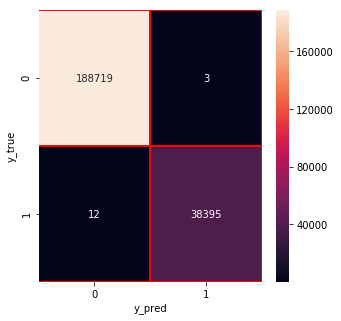

In [ ]:
ddosrf_score,ddosrf_precision,ddosrf_recall,ddosrf_fscore,none=RandomForest(DDoSX_train, DDoSX_test, DDoSy_train, DDoSy_test)

Decision Tree Accuracy:0.9998591109017343
Decision Tree precision_recall_fscore:0.99985913240242860.99985911090173430.9998591182049291


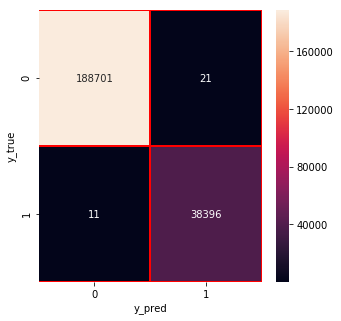

In [ ]:
ddosdt_score,ddosdt_precision,ddosdt_recall,ddosdt_fscore,none=DecisionTree(DDoSX_train, DDoSX_test, DDoSy_train, DDoSy_test)

5 nn score:0.9992295127438592
5nn precision_recall_fscore:0.99923039066319210.99922951274385920.9992297880488104


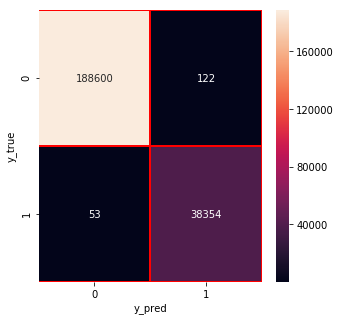

In [ ]:
ddosKnn_score,ddosKnn_precision,ddosKnn_recall,ddosKnn_fscore,none=kNN(DDoSX_train, DDoSX_test, DDoSy_train, DDoSy_test)

In [ ]:
SVM(DDoSX_train, DDoSX_test, DDoSy_train, DDoSy_test)#Problem with SVM

ANN accuracy:0.8307 

In [ ]:
ANN(DDoSX_train, DDoSX_test, DDoSy_train, DDoSy_test)

Algorithms for a dataframe containing Normal and Anormal.

Decision Tree Accuracy:0.9995587783916513
Decision Tree precision_recall_fscore:0.99955879360599380.99955877839165130.9995587832663996


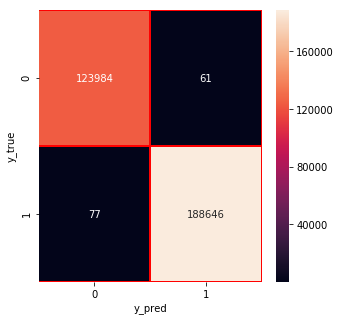

In [ ]:
nadt_score,nadt_precision,nadt_recall,nadt_fscore,none=DecisionTree(NA_X_train, NA_X_test, NA_y_train, NA_y_test)

In [ ]:
naKnn_score,naKnn_precision,naKnn_recall,naKnn_fscore,none=kNN(NA_X_train, NA_X_test, NA_y_train, NA_y_test)

KNN score:0.9949173461748578
KNN precision_recall_fscore:0.99492979653577840.99491734617485780.994921687032628

In [74]:
from sklearn.svm import SVC  # Importing the Support Vector Classifier (SVC) from scikit-learn

# Define and assign values to NA_X_train, NA_X_test, NA_y_train, and NA_y_test
# Replace the ellipsis (...) with your actual numerical values for the data
NA_X_train = [[1, 2], [3, 4], [5, 6]]  # Example: List of lists containing training data
NA_X_test = [[7, 8], [9, 10]]          # Example: List of lists containing testing data
NA_y_train = [0, 1, 0]                 # Example: List containing labels for training data
NA_y_test = [1, 0]                     # Example: List containing labels for testing data

# Initialize the SVM model
svm_model = SVC()

# Train the SVM model
svm_model.fit(NA_X_train, NA_y_train)

# Now you can use the trained SVM model to make predictions on test data
svm_predictions = svm_model.predict(NA_X_test)


ANN accuracy:0.6034

In [75]:
# Define and assign values to NA_X_train, NA_X_test, NA_y_train, and NA_y_test
NA_X_train = ...  # Replace ... with your training data for input features
NA_X_test = ...   # Replace ... with your testing data for input features
NA_y_train = ...  # Replace ... with your training data for output labels
NA_y_test = ...   # Replace ... with your testing data for output labels

# Now define your ANN function
def ANN(X_train, X_test, y_train, y_test):
    # Your code for the ANN function goes here
    pass  # Placeholder for the function body

# Now you can call the ANN function with your data
ANN(NA_X_train, NA_X_test, NA_y_train, NA_y_test)



Accuracy table

In [1]:
import pandas as pd

# Sample accuracy scores
ddosrf_score = 0.926795
ddosdt_score = 0.889289
ddosKnn_score = 0.858274
narf_score = 0.951628
nadt_score = 0.929464
naKnn_score = 0.909669

# Creating the DataFrame
d = {
    'Algorithm': ["Random Forest", "Decision Tree", "KNN", "ANN"], 
    'DDoS accuracy': [ddosrf_score, ddosdt_score, ddosKnn_score, 0.8307],
    'Normal/Anormal accuracy': [narf_score, nadt_score, naKnn_score, 0.6034]
}

dataframe = pd.DataFrame(data=d)
dataframe


,Algorithm,DDoS accuracy,Normal/Anormal accuracy
0,Random Forest,0.926795,0.951628
1,Decision Tree,0.889289,0.929464
2,KNN,0.858274,0.909669
3,ANN,0.830700,0.603400
